In [3]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import matplotlib.pyplot as plt
import pylab
import seaborn as sns
import time
import pprint
import warnings
from scipy.spatial import Voronoi, voronoi_plot_2d
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

# 1st Ans

(a)

C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\matplotlib\legend.py:640: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


[0.4371966891556671,
 0.6219492625713212,
 0.6964942616464492,
 0.30289331174856504,
 0.39635070747651047,
 0.4856284340914172,
 0.63058072802792,
 0.6551120497129304,
 0.6398683747708179,
 0.4199083895275912]

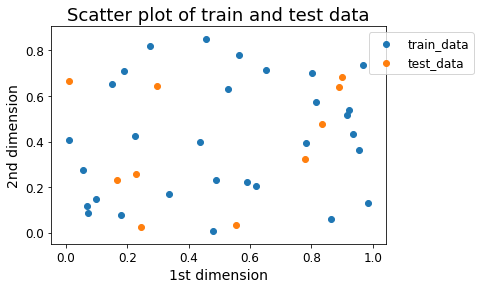

In [2]:
def KNN_predict(train_X,train_Y,test_X,k,tipe='classification',distance_metric='Euclidean'):
    predicts=[]
    for i in test_X:
        c=[]
        if distance_metric=='Euclidean':
            for j in train_X:
                c=c+[np.linalg.norm(j-i)]
        elif distance_metric=='Manhattan':
            for j in train_X:
                c=c+[sum(abs(j-i))]
        elif distance_metric=='Cosine':
            for j in train_X:
                c=c+[(np.linalg.norm(np.dot(j,i)))/(np.linalg.norm(i)*np.linalg.norm(j))]
        else:
            print('distance metric '+distance_metric+' not found')
        c=np.array(c,dtype='float')
        a=list(np.argsort(c))
        if distance_metric=='Euclidean' or distance_metric=='Manhattan':
            a=a[::-1]
        vals=[]
        for j in range(k):
            vals=vals+[float(train_Y[a[-(j+1)]])]
        if tipe=='classification':
            a,b=np.unique(vals,return_counts=True)
            predicts=predicts+[a[np.argmax(b)]]
        elif tipe=='regression':
            predicts=predicts+[np.mean(vals)]
        else:
            print('Invalid type entered')
    return predicts
train_X=np.matrix(np.random.random((30,2)))
plt.scatter(list(train_X[:,0]),list(train_X[:,1]),label='train_data')
train_Y=np.matrix(np.random.random((30,1)))
# print(list(float(i) for i in train_Y))
test_X=np.matrix(np.random.random((10,2)))
plt.scatter(list(test_X[:,0]),list(test_X[:,1]),label='test_data')
ax=plt.gca()
ax.legend(bbox_to_anchor=(1.28,1),loc='upperleft',fontsize=12)
ax.set_title('Scatter plot of train and test data',fontsize=18)
ax.set_xlabel('1st dimension',fontsize=14)
ax.set_ylabel('2nd dimension',fontsize=14)
ax.tick_params(axis='both',labelsize=12,which='major')
plt.rcParams["figure.figsize"]=[8,6]
KNN_predict(train_X,train_Y,test_X,3,tipe='regression',distance_metric='Euclidean')

(b)

Code for plot depicting KNN runtime with increase in no.of training instances

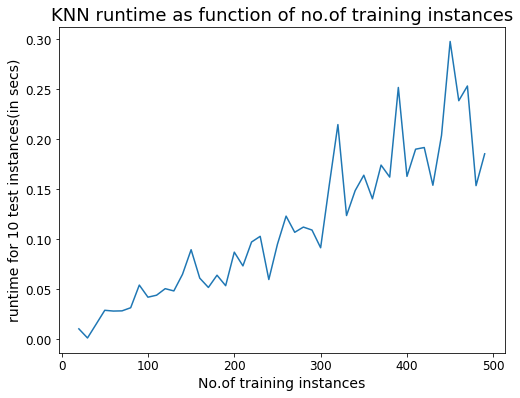

In [3]:
a=[]
d=[]
for i in range(20,500,10):
    d=d+[i]
    train_X=np.matrix(np.random.random((i,2)))
    train_Y=np.matrix(np.random.random((i,1)))
    test_X=np.matrix(np.random.random((10,2)))
    b=time.time()
    predicts=KNN_predict(train_X,train_Y,test_X,3,tipe='regression',distance_metric='Euclidean')
    c=time.time()
    a=a+[float(c-b)]
plt.plot(d,a,'-')
axes=plt.gca()
axes.set_xlabel('No.of training instances',fontsize=14)
axes.set_ylabel('runtime for 10 test instances(in secs)',fontsize=14)
axes.tick_params(axis='both',which='major',labelsize=12)
axes.set_title('KNN runtime as function of no.of training instances',fontsize=18)
plt.show()

Code for plot depicting KNN runtime with increase in no.of dimensions

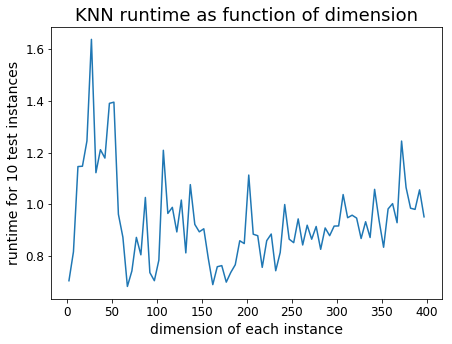

In [5]:
ad=[]
dd=[]
for i in range(2,400,5):
    dd=dd+[i]
    train_X=np.matrix(np.random.random((700,i)))
    train_Y=np.matrix(np.random.random((700,1)))
    test_X=np.matrix(np.random.random((30,i)))
    bd=time.time()
    predicts=KNN_predict(train_X,train_Y,test_X,7,tipe='regression',distance_metric='Euclidean')
    cd=time.time()
    ad=ad+[float(cd-bd)]
plt.plot(dd,ad,'-')
plt.rcParams['figure.figsize']=[7,5]
axes=plt.gca()
axes.set_xlabel('dimension of each instance',fontsize=14)
axes.set_ylabel('runtime for 10 test instances',fontsize=14)
axes.tick_params(axis='both',which='major',labelsize=12)
axes.set_title('KNN runtime as function of dimension',fontsize=18)
plt.show()

# 2nd Ans

Part-(a)

In [6]:
X=pd.read_csv('Real estate valuation data set.csv')
y=X['Y house price of unit area']
X=X.drop(['No'],axis=1)
X=X.rename(index=str,columns={'X1 transaction date':"x1",'X2 house age':"x2","X3 distance to the nearest MRT station":"x3","X4 number of convenience stores":
                           "x4","X5 latitude":"x5","X6 longitude":"x6","Y house price of unit area":"y"})
X=X.drop(['y'],axis=1)

In [7]:
lamda=list(range(1,21))
kf = KFold(n_splits=5,random_state=7)
kf.get_n_splits(X)
fold=0
for train_index, test_index in kf.split(X):
    print('Fold = ',fold+1,'-'*30)
    fold+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=7)
    lamdanew=1
    verror=10000000000
    for i in lamda:
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(X_train, y_train)
        yhat=model.predict(X_val)
        val_error=mean_squared_error(yhat,y_val)
        if val_error<verror:
            lamdanew=i
            score=val_error**0.5
            verror=val_error
    model=KNeighborsRegressor(n_neighbors=lamdanew)
    model.fit(X_train,y_train)
    train_error=mean_squared_error(y_train,model.predict(X_train))**0.5
    test_error=mean_squared_error(y_test,model.predict(X_test))**0.5
    print('Optimal k : ',lamdanew)
    print('Train error: ',train_error)
    print('Cross validation error: ',score)
    print('Test error: ',test_error)

Fold =  1 ------------------------------
Optimal k :  2
Train error:  4.952079070573502
Cross validation error:  7.6688067530043655
Test error:  8.24356996592693
Fold =  2 ------------------------------
Optimal k :  2
Train error:  5.019947897532343
Cross validation error:  6.603809393635062
Test error:  7.832820200231626
Fold =  3 ------------------------------
Optimal k :  1
Train error:  0.9845395785940664
Cross validation error:  7.586988075626683
Test error:  8.922997227281442
Fold =  4 ------------------------------
Optimal k :  4
Train error:  6.176567093508016
Cross validation error:  7.142425666605504
Test error:  10.652519287411533
Fold =  5 ------------------------------
Optimal k :  4
Train error:  7.04306580569827
Cross validation error:  8.001505222200104
Test error:  6.999764804411157


Part-(b)

In [8]:
X=pd.read_csv('Real estate valuation data set.csv')
y=X['Y house price of unit area']
X=X.drop(['No'],axis=1)
X=X.rename(index=str,columns={'X1 transaction date':"x1",'X2 house age':"x2","X3 distance to the nearest MRT station":"x3","X4 number of convenience stores":
                           "x4","X5 latitude":"x5","X6 longitude":"x6","Y house price of unit area":"y"})
X=X.drop(['x1','y'],axis=1)

In [9]:
lamda=list(range(1,21))
kf = KFold(n_splits=5,random_state=7)
kf.get_n_splits(X)
fold=0
for train_index, test_index in kf.split(X):
    print('Fold = ',fold+1,'-'*30)
    fold+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    X_train=preprocessing.normalize(X_train)
    X_test=preprocessing.normalize(X_test)
    y_train, y_test = y[train_index], y[test_index]
#     y_train=preprocessing.scale(y_train)
#     y_test=preprocessing.scale(y_test)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=7)
    lamdanew=1
    verror=10000000000
    for i in lamda:
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(X_train, y_train)
        yhat=model.predict(X_val)
        val_error=mean_squared_error(yhat,y_val)
        if val_error<verror:
            lamdanew=i
            score=val_error**0.5
            verror=val_error
    model=KNeighborsRegressor(n_neighbors=lamdanew)
    model.fit(X_train,y_train)
    train_error=mean_squared_error(y_train,model.predict(X_train))**0.5
    test_error=mean_squared_error(y_test,model.predict(X_test))**0.5
    print('Optimal k: ',lamdanew)
    print('Train error: ',train_error)
    print('Cross validation error: ',score)
    print('Test error: ',test_error)

Fold =  1 ------------------------------
Optimal k:  1
Train error:  1.9821456846436678
Cross validation error:  8.077802641955797
Test error:  9.146142777742067
Fold =  2 ------------------------------
Optimal k:  7
Train error:  7.771822021409621
Cross validation error:  6.917912360132892
Test error:  8.831157818432667
Fold =  3 ------------------------------
Optimal k:  10
Train error:  7.917563067272811
Cross validation error:  8.064757678809107
Test error:  8.348162195848422
Fold =  4 ------------------------------
Optimal k:  4
Train error:  6.061186791542535
Cross validation error:  7.575445777731057
Test error:  10.592466136619068
Fold =  5 ------------------------------
Optimal k:  2
Train error:  5.144551064998515
Cross validation error:  8.131117673903491
Test error:  8.43094799808073


Part-(c)

In [10]:
X=pd.read_csv('Real estate valuation data set.csv')
columns=list(X.columns)
y=X['Y house price of unit area']
X=X.drop(['No'],axis=1)
X=X.rename(index=str,columns={'X1 transaction date':"x1",'X2 house age':"x2","X3 distance to the nearest MRT station":"x3","X4 number of convenience stores":
                           "x4","X5 latitude":"x5","X6 longitude":"x6","Y house price of unit area":"y"})
X=X.drop(['x1','y'],axis=1)

C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\matplotlib\legend.py:640: UserWarning: Unrecognized location "lowerright". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


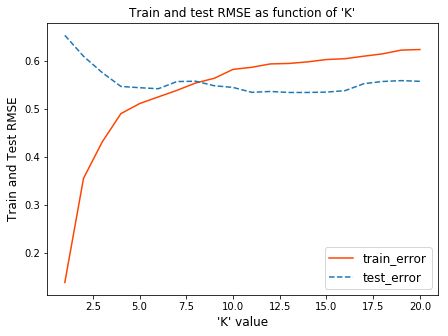

In [11]:
train_errs=[]
test_errs=[]
kvals=[]
lamda=list(range(1,21))
kf = KFold(n_splits=5,random_state=7)
kf.get_n_splits(X)
fold=0
for train_index, test_index in kf.split(X):
    fold+=1
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    X_train=preprocessing.normalize(X_train)
    X_test=preprocessing.normalize(X_test)
    y_train, y_test = y[train_index], y[test_index]
    y_train=preprocessing.scale(y_train)
    y_test=preprocessing.scale(y_test)
    lamdanew=1
    verror=10000000000
    for i in lamda:
        kvals=kvals+[i]
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(X_train, y_train)
        y1hat=model.predict(X_train)
        train_error=mean_squared_error(y1hat,y_train)
        train_errs=train_errs+[train_error**0.5]
        y2hat=model.predict(X_test)
        test_error=mean_squared_error(y2hat,y_test)
        test_errs=test_errs+[test_error**0.5]
    break
axes=pylab.gca()
pylab.rcParams["figure.figsize"] = [8,5]
pylab.plot(kvals,train_errs,'-',color='orangered')
pylab.plot(kvals,test_errs,'--')
axes.set_xlabel('\'K\' value',fontsize=12)
axes.set_ylabel('Train and Test RMSE',fontsize=12)
axes.set_title('Train and test RMSE as function of \'K\'',fontsize=12)
pylab.legend(('train_error','test_error'),loc='lowerright',fontsize=12)
warnings.filterwarnings('ignore')

Sub Part - i

In [12]:
kf = KFold(n_splits=5,random_state=7)
kf.get_n_splits(X)
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    X_train=preprocessing.normalize(X_train)
    X_testt=preprocessing.normalize(X_test)
    y_train, y_test = y[train_index], y[test_index]
    y_train=preprocessing.scale(y_train)
    y_test=preprocessing.scale(y_test)
    model = KNeighborsRegressor(n_neighbors=5)
    model.fit(X_train, y_train)
    y2hat=model.predict(X_testt)
    test_errors=np.square(np.subtract(y2hat,y_test))
    required_home=X_test.iloc[np.argmax(test_errors)]
    print('For this test dataset, the details of the house with maximum RMSE are given below')
#     print(columns[2:-1])
#     print(required_home)
    home=dict(zip(columns[2:-1],required_home))
    pprint.pprint(home)
    break

For this test dataset, the details of the house with maximum RMSE are given below
{'X2 house age': 35.9,
 'X3 distance to the nearest MRT station': 640.7391,
 'X4 number of convenience stores': 3.0,
 'X5 latitude': 24.97563,
 'X6 longitude': 121.53715}


# 3rd Ans

In [4]:
from sklearn.datasets import load_iris
plt.rcParams["figure.figsize"] = [14,7]
iris = load_iris()
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])
data.columns = ['sepal length', 'sepal width', 'pedal length', 'pedal width', 'target']
points = data.iloc[:,[0,1]]

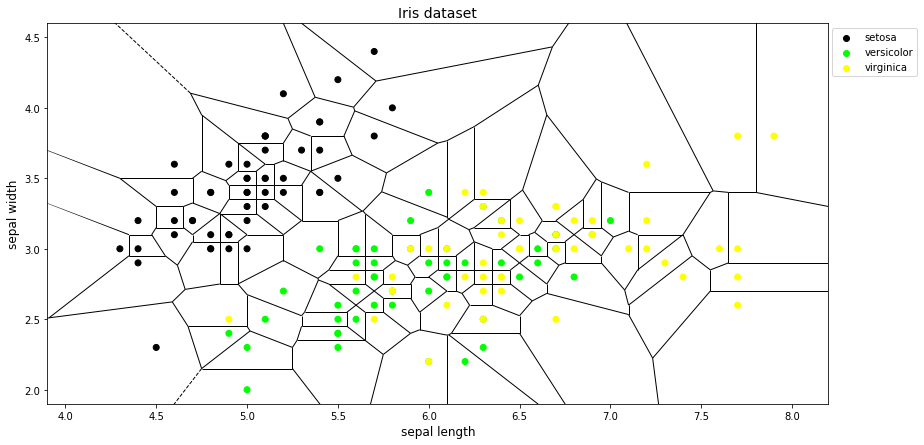

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
120    2.0
121    2.0
122    2.0
123    2.0
124    2.0
125    2.0
126    2.0
127    2.0
128    2.0
129    2.0
130    2.0
131    2.0
132    2.0
133    2.0
134    2.0
135    2.0
136    2.0
137    2.0
138    2.0
139    2.0
140    2.0
141    2.0
142    2.0
143    2.0
144    2.0
145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, Length: 150, dtype: float64


In [5]:
vor = Voronoi(points)
voronoi_plot_2d(vor, show_vertices=False, show_points=False)
pointsplot=plt.scatter(x=data["sepal length"], y=data["sepal width"], c=data["target"], cmap=matplotlib.colors.ListedColormap(['black','lime','yellow']))
plt.legend((pointsplot,pointsplot,pointsplot), (iris.target_names),bbox_to_anchor=(1.12,1))
axes = plt.gca()
axes.set_xlabel('sepal length',fontsize=12)
axes.set_ylabel('sepal width',fontsize=12)
axes.set_xlim(3.9,8.2)
axes.set_ylim(1.9,4.6)
axes.set_title("Iris dataset",fontsize=14)
leg = axes.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_color('lime')
leg.legendHandles[2].set_color('yellow')
plt.show()
print(data['target'])